# News Mood
----

### Analysis
CBS News and CNN Breaking News had the most negative Vader sentiment analysis.

BBC had a slightly positive score of 0.05. This is the news outlet with a score that is closest to neutral.

This analysis is highly dependent on events that occure that day as it pulls the latest 100 tweets from the news organization.

Fox News had the most positive Vader sentiment analysis.



In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Output File (CSV)
output_data_file = "output_data/NewsMood.csv"

In [5]:
target_users = ("@BBC", "@CBSNews", "@CNNbrk", "@FoxNews", "@NYTimes")

sentiments = []

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 1

    #Get all tweets from each users timeline

    public_tweets = api.user_timeline(user, count = 100)

    #Loop through the tweets
    for tweet in public_tweets:

        #Vader analysis on each tweet.
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago= counter
        tweet_text = tweet["text"]

        #Add to the sentiment list

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet["text"]})
        #Add to counter.
        counter = counter + 1

In [6]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame(sentiments)
sentiments_pd.to_csv(output_data_file, index=False)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Sat Oct 06 18:06:06 +0000 2018,0.000,1.000,0.000,Most polite stag do ever 😂 https://t.co/Vdz6ab...,1,@BBC
1,0.0000,Sat Oct 06 17:07:02 +0000 2018,0.000,1.000,0.000,A horse walks into a bar... https://t.co/0e9rc...,2,@BBC
2,0.4939,Sat Oct 06 16:05:06 +0000 2018,0.000,0.819,0.181,Hundreds of sculptures lie at the bottom of th...,3,@BBC
3,-0.5574,Sat Oct 06 15:54:44 +0000 2018,0.265,0.735,0.000,RT @BBCNewsEnts: Opera singer Montserrat Cabal...,4,@BBC
4,0.0000,Sat Oct 06 15:32:00 +0000 2018,0.000,1.000,0.000,These caves in rural Italy have been transform...,5,@BBC
5,-0.4189,Sat Oct 06 15:11:07 +0000 2018,0.238,0.655,0.108,Please can everyone stop drinking their own ur...,6,@BBC
6,0.0000,Sat Oct 06 14:06:03 +0000 2018,0.000,1.000,0.000,"Going, going, gone!\n\nA Banksy artwork shredd...",7,@BBC
7,-0.4939,Sat Oct 06 13:10:02 +0000 2018,0.225,0.775,0.000,❤️ George Shelley opens up about grief and how...,8,@BBC
8,-0.4588,Sat Oct 06 12:08:01 +0000 2018,0.231,0.769,0.000,Footage shows hundreds of tents abandoned by p...,9,@BBC
9,0.5095,Sat Oct 06 11:07:05 +0000 2018,0.127,0.586,0.288,"🎓 Losing friends, moving home and being broke....",10,@BBC


In [7]:
#Seperate by news organizations
BBC = sentiments_pd.loc[(sentiments_pd["User"] == "@BBC")]
CBS = sentiments_pd.loc[(sentiments_pd["User"] == "@CBSNews")]
CNN = sentiments_pd.loc[(sentiments_pd["User"] == "@CNNbrk")]
FN = sentiments_pd.loc[(sentiments_pd["User"] == "@FoxNews")]
NYT = sentiments_pd.loc[(sentiments_pd["User"] == "@nytimes")]

#Retrieve x axis and y axis for each news organization
x_bbc= BBC["Tweets Ago"]
y_bbc= BBC["Compound"]
l_bbc= "BBC"

x_cbs= CBS["Tweets Ago"]
y_cbs= CBS["Compound"]
l_cbs= "CBSNews"

x_cnn= CNN["Tweets Ago"]
y_cnn= CNN["Compound"]
l_cnn= "CNN Breaking News"

x_fn= FN["Tweets Ago"]
y_fn= FN["Compound"]
l_fn= "Fox"

x_nyt= NYT["Tweets Ago"]
y_nyt= NYT["Compound"]
l_nyt= "New York Times"

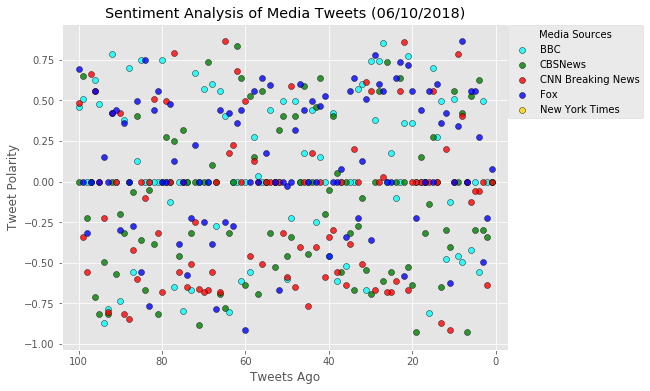

In [8]:
#create plot
plt.figure(figsize=(8,6))
plt.scatter(x_bbc,y_bbc, marker="o", facecolors ="aqua",
            edgecolors='black',alpha=0.8, label= l_bbc)
plt.scatter(x_cbs,y_cbs, marker="o", facecolors ="green",
            edgecolors='black',alpha=0.8, label= l_cbs)
plt.scatter(x_cnn,y_cnn, marker="o", facecolors ="red",
            edgecolors='black',alpha=0.8, label= l_cnn)
plt.scatter(x_fn,y_fn, marker="o", facecolors ="blue",
            edgecolors='black',alpha=0.8, label= l_fn)
plt.scatter(x_nyt,y_nyt, marker="o", facecolors ="gold",
            edgecolors='black',alpha=0.8, label= l_nyt)

#Plot other graph properties
now = datetime.now()
now = now.strftime("%d/%m/%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([max(x_bbc)+4,min(x_bbc)-4]) 
plt.legend(title= "Media Sources", loc='upper right',bbox_to_anchor=(1.314, 1.01))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("output_data/Sentiment Analysis of Media Tweets.png")
plt.show()

In [9]:
#Get the mean compound sentiments per user
sentiment_bar = sentiments_pd.groupby("User")["Compound"].mean()
sentiment_bar

User
@BBC        0.051010
@CBSNews   -0.105209
@CNNbrk    -0.118747
@FoxNews    0.132330
@NYTimes    0.086555
Name: Compound, dtype: float64

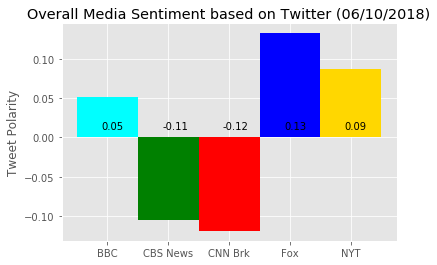

In [10]:
#Retrieve compound values for each news organization
comm= [sentiment_bar["@BBC"],sentiment_bar["@CBSNews"],sentiment_bar["@CNNbrk"],
       sentiment_bar["@FoxNews"],sentiment_bar["@NYTimes"]]
x_axis = np.arange(len(comm))
position = 0
for sentiment in sentiment_bar:
# Tell matplotlib that we will be making a bar chart
# Comm is our y axis and x_axis is our x axis
    plt.bar(x_axis, comm, color=['aqua','green','red','blue','gold'],alpha=1,align="center",width=1)
    #For text on each bar
    plt.text(position-0.1, 0.01, str(round(sentiment,2)))
    position = position + 1
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS News", "CNN Brk", "Fox", "NYT"])
plt.xlim(-0.75, len(x_axis)-0.25)

#Plot other graph properties
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.ylabel("Tweet Polarity")
plt.savefig("output_data/Overall Media Sentiment based on Twitter.png")
plt.show()